# Sentiment Analysis of Real-time Flipkart Product Reviews

## Read Data

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df=pd.read_csv(r"C:\Users\varsh\Downloads\reviews_data_dump\reviews_badminton\data.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [117]:
df.shape

(8518, 8)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


## Exploratory Data Analysis

In [119]:
df['Ratings'].value_counts(normalize=True)

Ratings
5    0.596384
4    0.204978
1    0.090279
3    0.072200
2    0.036159
Name: proportion, dtype: float64

<Axes: xlabel='Ratings', ylabel='count'>

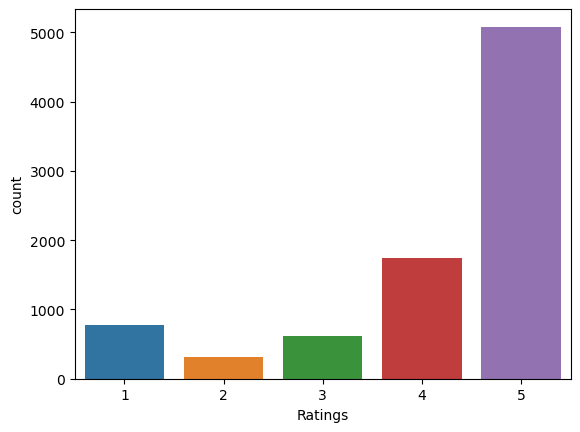

In [120]:
sns.countplot(x='Ratings',data=df)

In [121]:
df['Ratings']=pd.to_numeric(df['Ratings'],errors = 'ignore')
def change_rating(value):
    if pd.notnull(value):
        if value > 2:
            return "Positive"
        else:
            return "Negative"
    else:
        return None
df['Ratings'] = df['Ratings'].apply(change_rating)
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",Positive
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,Negative


<Axes: xlabel='Ratings', ylabel='count'>

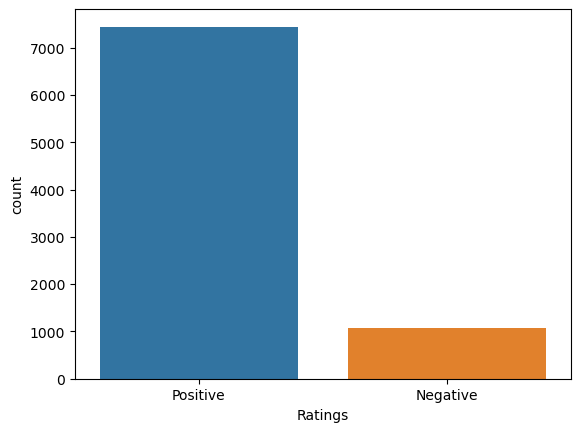

In [122]:
sns.countplot(x='Ratings',data=df)

## Splitting of the Data into Train and Test 

In [123]:
X=df[['Review text']]
y=df['Ratings']
print(X.shape,y.shape)

(8518, 1) (8518,)


In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
print("The input training data size:",X_train.shape)
print("The output training data size:",y_train.shape)
print("The input testing data size:",X_test.shape)
print("The output testing data size:",y_test.shape)

The input training data size: (6388, 1)
The output training data size: (6388,)
The input testing data size: (2130, 1)
The output testing data size: (2130,)


In [125]:
X_train.columns=['Review Text']
X_train.head()

,Review Text
6113,GoodREAD MORE
1377,Well brandREAD MORE
2127,Firstly Yonex is best company for badminton ...
3271,"Nice product , Thanks to flipkartREAD MORE"
8374,In my location at direct sport showrooms i bou...


## Cleaning the data 

In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6388 entries, 6113 to 235
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  6381 non-null   object
dtypes: object(1)
memory usage: 99.8+ KB


In [127]:
#replacing missing values with previous ones
X_train=X_train.fillna(method='pad')

In [128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6388 entries, 6113 to 235
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  6388 non-null   object
dtypes: object(1)
memory usage: 99.8+ KB


In [129]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2130 entries, 5809 to 1095
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review text  2129 non-null   object
dtypes: object(1)
memory usage: 33.3+ KB


In [130]:
X_test=X_test.fillna(method='pad')

In [131]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2130 entries, 5809 to 1095
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review text  2130 non-null   object
dtypes: object(1)
memory usage: 33.3+ KB


In [132]:
y_train.info()
print("******************y_test*********************")
y_test.info()

<class 'pandas.core.series.Series'>
Index: 6388 entries, 6113 to 235
Series name: Ratings
Non-Null Count  Dtype 
--------------  ----- 
6388 non-null   object
dtypes: object(1)
memory usage: 99.8+ KB
******************y_test*********************
<class 'pandas.core.series.Series'>
Index: 2130 entries, 5809 to 1095
Series name: Ratings
Non-Null Count  Dtype 
--------------  ----- 
2130 non-null   object
dtypes: object(1)
memory usage: 33.3+ KB


## Data Preprocessing of Train Data- Text Processing

In [133]:
#importing the required libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [134]:
lemmatizer=WordNetLemmatizer()

In [135]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [137]:
def preprocess(raw_text,words_to_remove):
    sentence=re.sub("[^a-zA-Z]"," ",raw_text)
    for i in words_to_remove:
        pattern=re.compile(r'\b%s\b|\b%s(?=\w)|(?<=\w)%s\b' % (i,i,i),flags=re.IGNORECASE)
        sentence=pattern.sub('',sentence)
    sentence=sentence.lower() #changing to lower case
    tokens=sentence.split()
    clean_tokens=[t for t in tokens if not t in stopwords.words("english")]
    clean_tokens=[lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([" ".join(clean_tokens),len(clean_tokens)])   

In [138]:
from tqdm import tqdm,tqdm_notebook

In [139]:
tqdm.pandas()

In [140]:
#We can observe "Read More" in some of the sentences.
words_to_remove=["read","more","shuttle","product"]
temp_df=X_train['Review Text'].progress_apply(lambda x:preprocess(x,words_to_remove))

100%|████████████████████████████████████████████████████████████████████████████| 6388/6388 [00:04<00:00, 1407.07it/s]


In [141]:
temp_df.columns=['clean_text_lemma','text_length_lemma']
X_train_clean=temp_df['clean_text_lemma']
temp_df.head()

,clean_text_lemma,text_length_lemma
6113,good,1
1377,well brand,2
2127,firstly yonex best company badminton better yonex,7
3271,nice thanks flipkart,3
8374,location direct sport showroom bought r online...,10


In [142]:
X_train=pd.concat([X_train,temp_df],axis=1)
X_train.head()

,Review Text,clean_text_lemma,text_length_lemma
6113,GoodREAD MORE,good,1
1377,Well brandREAD MORE,well brand,2
2127,Firstly Yonex is best company for badminton ...,firstly yonex best company badminton better yonex,7
3271,"Nice product , Thanks to flipkartREAD MORE",nice thanks flipkart,3
8374,In my location at direct sport showrooms i bou...,location direct sport showroom bought r online...,10


## Data Preprocessing of Test Data- Text Processing

In [143]:
#We can observe "Read More" in some of the sentences.
words_to_remove=["read","more","shuttle","product"]
temp1_df=X_test['Review text'].progress_apply(lambda x:preprocess(x,words_to_remove))
temp1_df.columns=['clean_text_lemma','text_len_lemma']
X_test_clean=temp1_df['clean_text_lemma']

100%|████████████████████████████████████████████████████████████████████████████| 2130/2130 [00:01<00:00, 1377.05it/s]


## Creating the WordCloud

In [144]:
from wordcloud import WordCloud
y_train

6113    Positive
1377    Positive
2127    Positive
3271    Positive
8374    Negative
          ...   
2895    Positive
7813    Positive
905     Positive
5192    Negative
235     Negative
Name: Ratings, Length: 6388, dtype: object

### Postive Reviews

In [145]:
positive_df=X_train.loc[(y_train=='Positive'),:]
cleaned_pos_word=" ".join(positive_df['clean_text_lemma'])
positive_df.head()

,Review Text,clean_text_lemma,text_length_lemma
6113,GoodREAD MORE,good,1
1377,Well brandREAD MORE,well brand,2
2127,Firstly Yonex is best company for badminton ...,firstly yonex best company badminton better yonex,7
3271,"Nice product , Thanks to flipkartREAD MORE",nice thanks flipkart,3
2672,It's goodREAD MORE,good,1


### Negative reviews

In [146]:
negative_df=X_train.loc[y_train=='Negative',:]
negative_df.head()

,Review Text,clean_text_lemma,text_length_lemma
8374,In my location at direct sport showrooms i bou...,location direct sport showroom bought r online...,10
7532,Received a completely different item of cheap ...,received completely different item cheap quality,6
2356,Quality is not goodREAD MORE,quality good,2
3741,Tx product but price costlyREAD MORE,tx price costly,3
8353,Today i am totally hearted by delivery boy of ...,today totally hearted delivery boy rudely beha...,9


### Wordcloud for positive reviews

In [147]:
pos_words=' '.join(positive_df['clean_text_lemma'])
pos_wordcloud=WordCloud(stopwords=stopwords.words("english"),background_color='black',width=1600,height=900).generate(cleaned_pos_word)

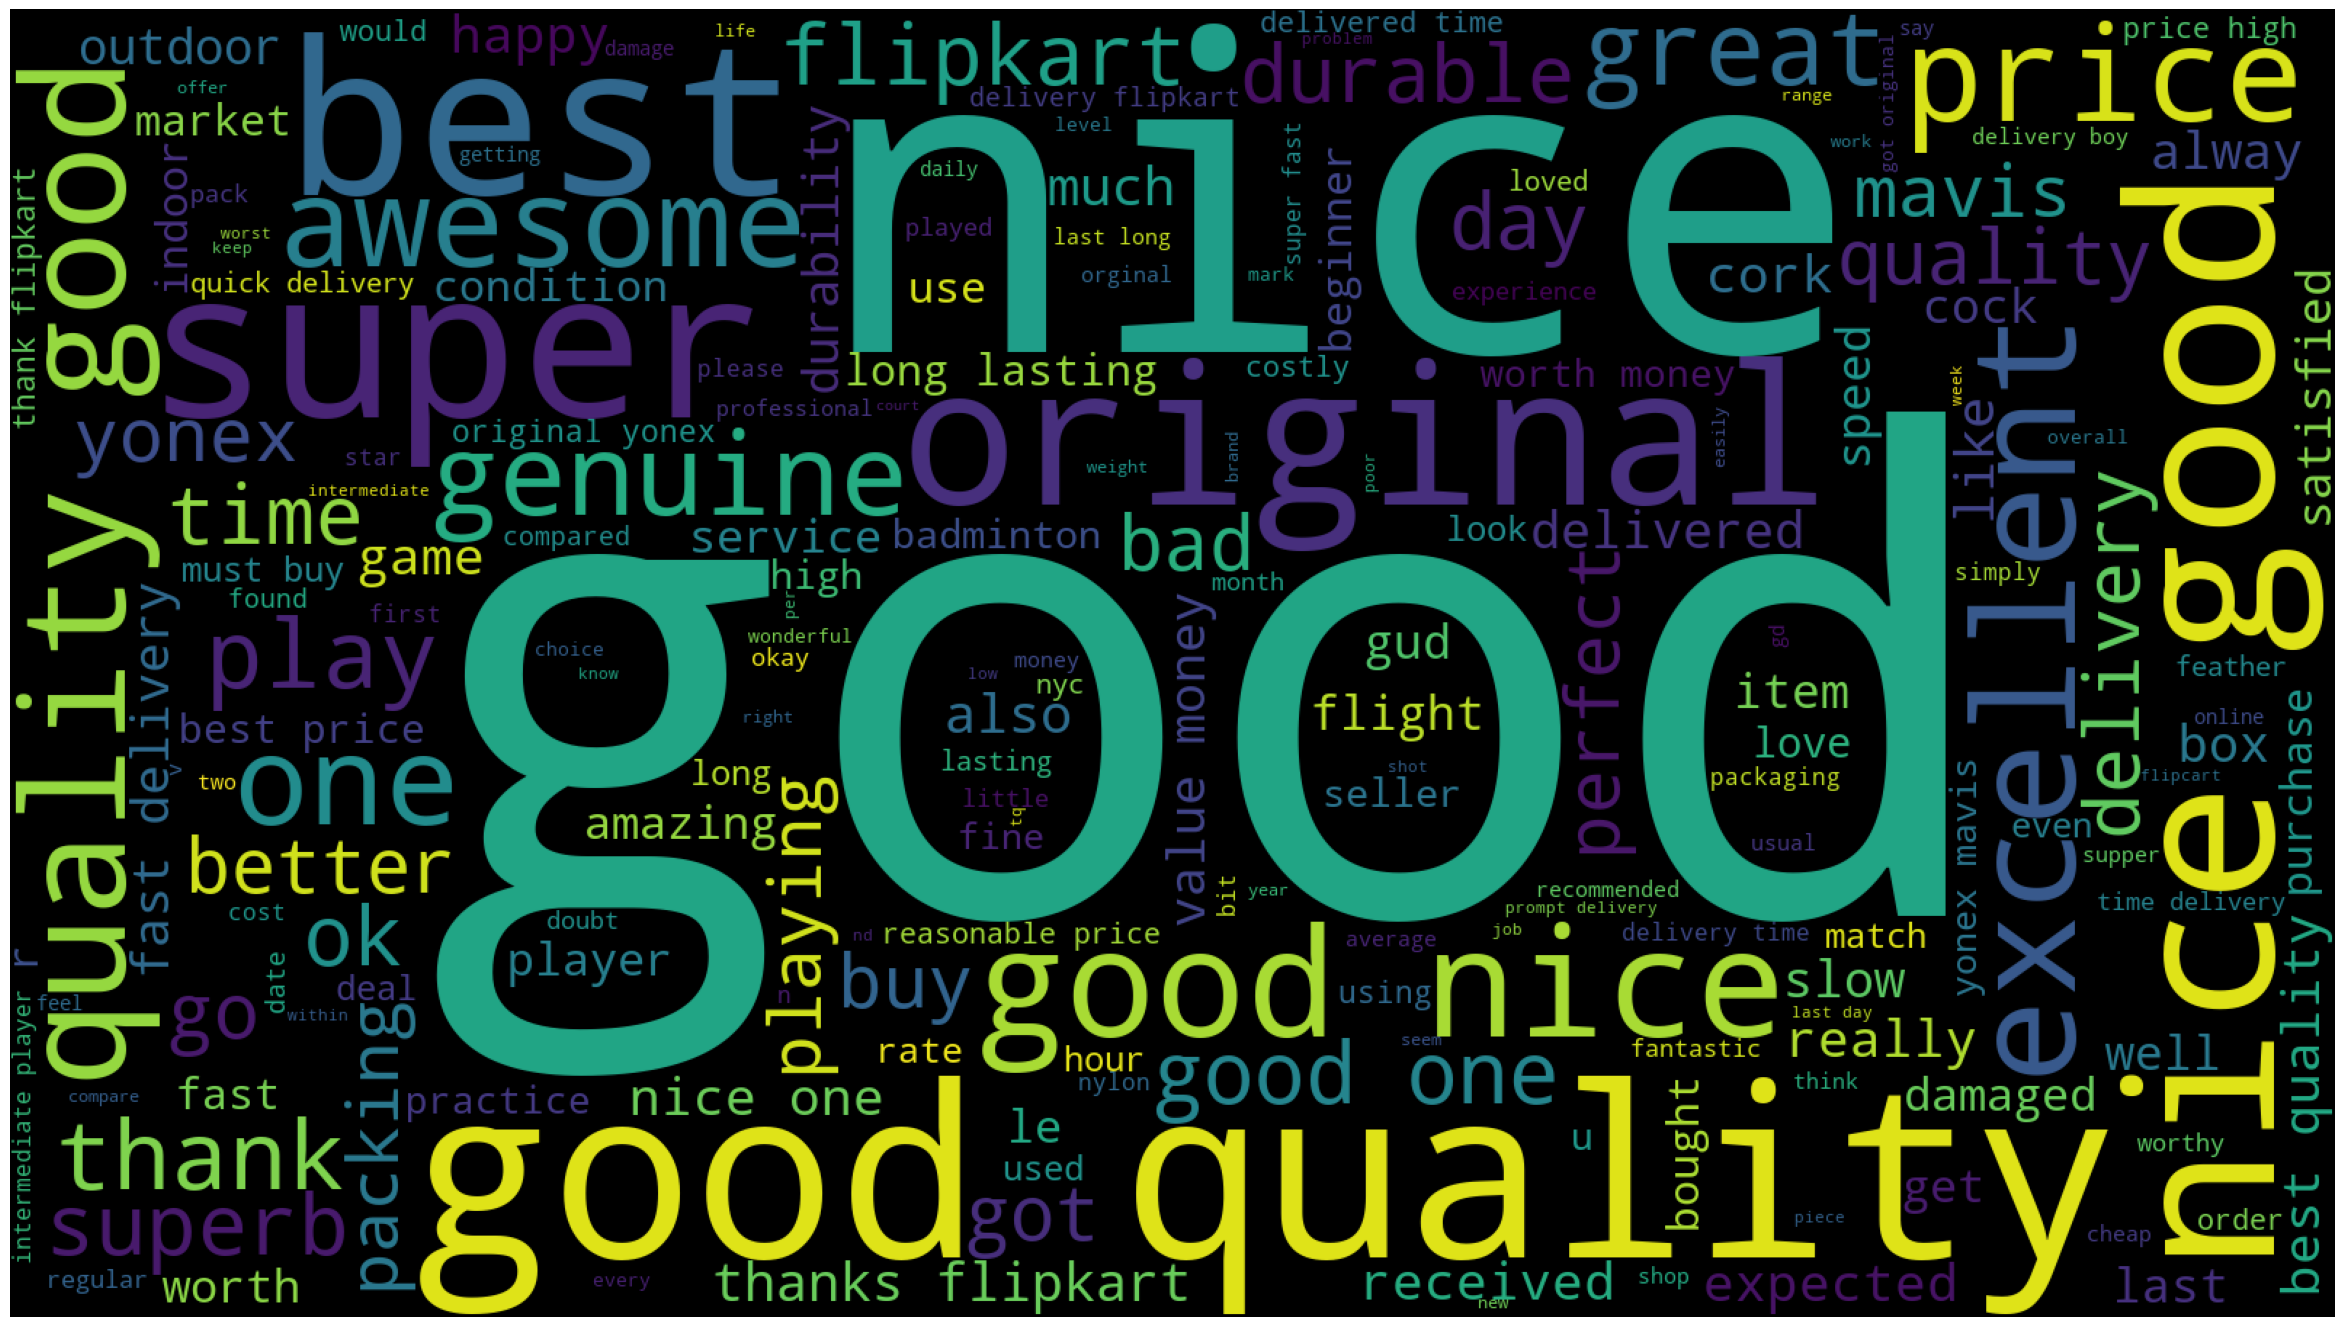

In [148]:
plt.figure(1,figsize=(30,20))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show()

### Wordcloud for negative reviews

In [149]:
nega_words=' '.join(negative_df['clean_text_lemma'])
nega_wordcloud=WordCloud(stopwords=stopwords.words("english"),background_color='black',width=1600,height=900).generate(nega_words)

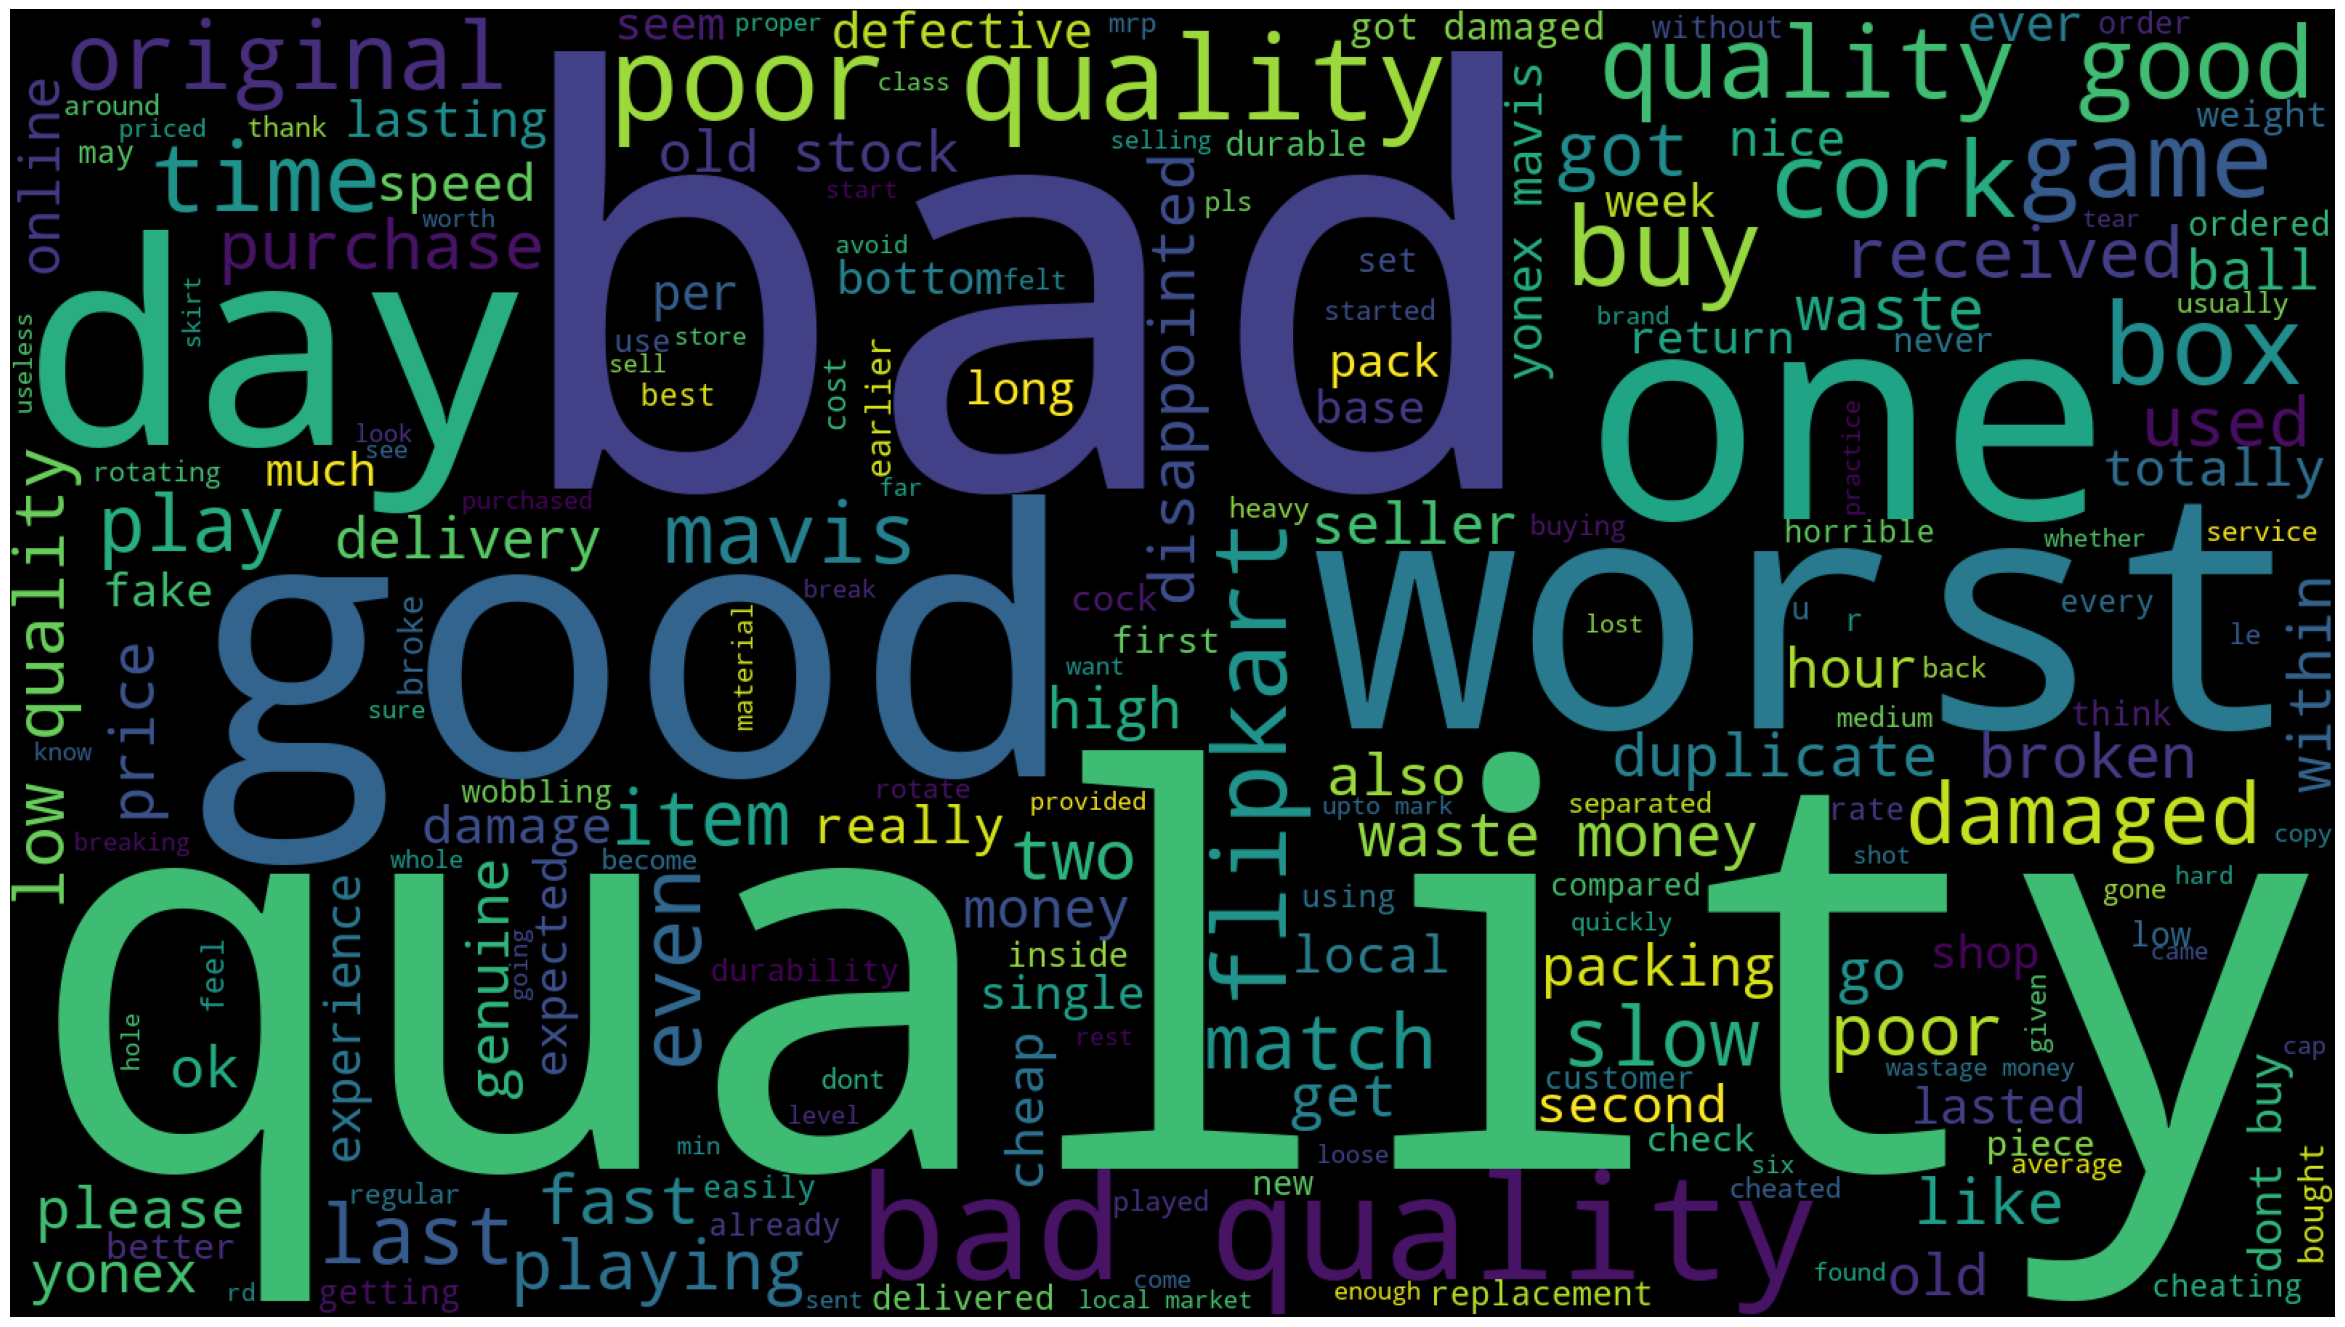

In [150]:
plt.figure(1,figsize=(30,20))
plt.imshow(nega_wordcloud)
plt.axis('off')
plt.show()

## Optimal Workflow

In [155]:
#import the necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [156]:
import joblib
from joblib import Memory

import os

In [153]:
import warnings
warnings.filterwarnings('ignore')

In [154]:
# Create a memory object to fasten the results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

#various implementations of classifications are defined in the pipelines

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

#Parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

all_models={}
for i in pipelines.keys():
    print("-"*10,i,"-"*10)
    #hyperparamerter tuning using GridSeachCV in sklear where folding factor is 5, scoring metric is F1 score.
    grid_search=GridSearchCV(estimator=pipelines[i],param_grid=param_grids[i],cv=5,scoring='f1_macro',return_train_score=True,verbose=1)

    %time grid_search.fit(X_train_clean,y_train)
    all_models[i]=grid_search.best_estimator_
    print('Score on Test Data: ',grid_search.score(X_test_clean,y_test))

---------- naive_bayes ----------
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 4.22 s
Wall time: 6.19 s
Score on Test Data:  0.793290022048192
---------- decision_tree ----------
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 14.4 s
Wall time: 18 s
Score on Test Data:  0.7574123989218329
---------- logistic_regression ----------
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 4min 48s
Wall time: 5min 7s
Score on Test Data:  0.7958322583419333


In [159]:
#Serialization
from sklearn import tree, model_selection, metrics
for name, model in all_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred,pos_label='Positive'))
    
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 14 ms
Test Score (F1) 0.9528351881293058
Model Size: 74518 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 8.49 ms
Test Score (F1) 0.9433962264150944
Model Size: 157164 Bytes
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 6.98 ms
Test Score (F1) 0.9413377192982456
Model Size: 67737 Bytes


In [166]:
model=joblib.load('best_models/naive_bayes.pkl')
data=["The product is so bad"]
data_clean=[preprocess(x,words_to_remove) for x in data]
prediction=model.predict(data)
print(prediction)

['Negative']
